# The random phase approximation (RPA)


The Lindhard susceptibility $\chi_0$ is the exact susceptibility for the non-interacting case $U=0$, however for finite interactions the susceptibility of the system $\chi$ is given by the Behte-Salpeter equation

$$ \chi = \chi_0 + \chi_0 \Gamma \chi $$

where $\Gamma$ is the particle-hole irreducible vertex function, containing all diagrams with insertions of the interaction that can not be separated by cutting a pair of particle-hole single-particle propagators $G G$.

The first order contribution to the vertex $\Gamma$ is the bare interaction $U$ and the approximation

$$ \Gamma = U/2 $$

gives the so-called random phase approximation for $\chi$, i.e.

$$ \chi_{RPA} = \chi_0 + \chi_0 \frac{U}{2} \chi_{RPA} $$

Rewriting this equation gives $\chi_{RPA}$ as

$$ \chi_{RPA} = \frac{\chi_0}{1 - \frac{U}{2} \chi_0} $$

we note that the denominator of this equation can in general go to zero, whereby the susceptibility $\chi_{RPA}$ diverges. Whence the RPA approximation can be used to compute instabilities of the system towards, e.g., anti-ferromagnetic symmetry breaking.

As an example we compute $\chi_{RPA}$ for the square lattice and the enhancement of the $\mathbf{q} = (\pi, \pi)$ peak as a function of $U$.

RPA predicts a transition to an antiferromagnetic state at a finite temperature. This is unphysical in two dimensions where the Mermin Wagner theorem tells us that the transition is a zero temperature. We will see how to fix this later. 

## Q : Plot the RPA susceptibility

- Compute the RPA susceptibility for $U = 2.7$
- Plot it


## Load Lindhard chi from archive

In [22]:
# Imports 
%matplotlib inline
from pytriqs.lattice import BravaisLattice, BrillouinZone
from pytriqs.gf import MeshBrillouinZone, MeshImFreq, Gf, MeshProduct, inverse
from pytriqs.archive import HDFArchive
from pytriqs.plot.mpl_interface import oplot
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from math import cos, pi

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,9) # set default size for all figuresfrom pytriqs.archive import HDFArchive

In [23]:
# Reload the previous result
with HDFArchive("tpsc.h5",'r') as R:
    chi0_kw = R['chi0_kw']

In [24]:
# chi
U = 2.7
chi = lambda kx, ky: (chi0_kw((kx,ky,0),0) / (1. - U * chi0_kw((kx,ky,0),0))).real

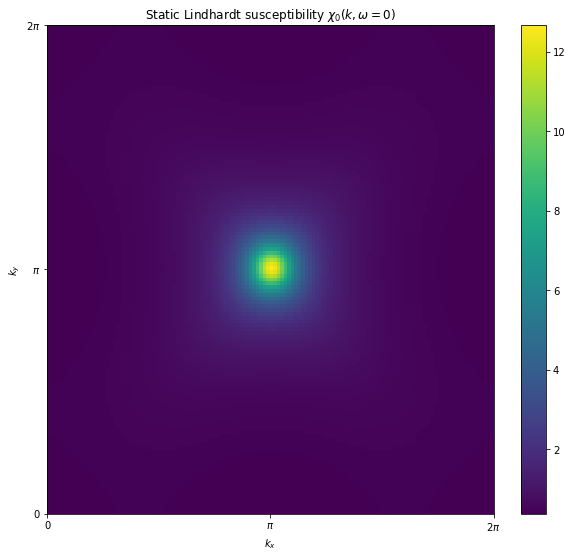

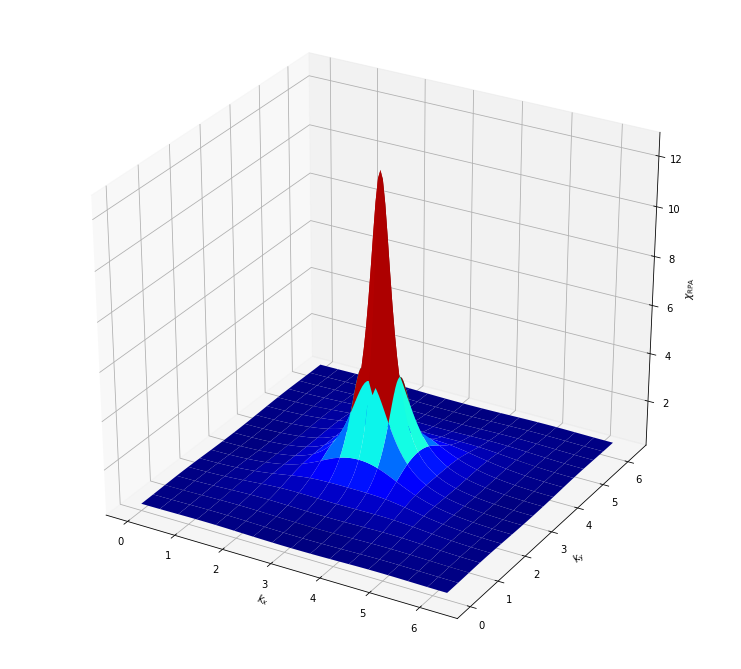

In [25]:
# Make a simple 2d grid
nk = chi0_kw.mesh[0].linear_dims[0] + 1       
k = np.linspace(0, 2*pi, nk, endpoint=True)
kx, ky = np.meshgrid(k, k)

# 2d color plot
plt.pcolor(kx, ky, np.vectorize(chi)(kx,ky))
plt.xlim(0, 2*pi); plt.ylim(0, 2*pi)
# decoration
plt.colorbar()
plt.xticks([0, pi, 2*pi],[r"0",r"$\pi$",r"$2\pi$"])    
plt.yticks([0, pi, 2*pi],[r"0",r"$\pi$",r"$2\pi$"])
plt.xlabel(r'$k_x$'); plt.ylabel(r'$k_y$')
plt.title('Static Lindhard susceptibility $\chi_0(k, \omega=0)$')

# Here is a 3d plot. 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(kx, ky, np.vectorize(chi)(kx,ky), cmap="jet", rstride=8, cstride=8)
# decoration
ax.set_xlabel(r"$k_x$"); ax.set_ylabel(r"$k_y$")
ax.set_zlabel(r"$\chi_\mathrm{RPA}$");

## Plot along some path for different values of $U$

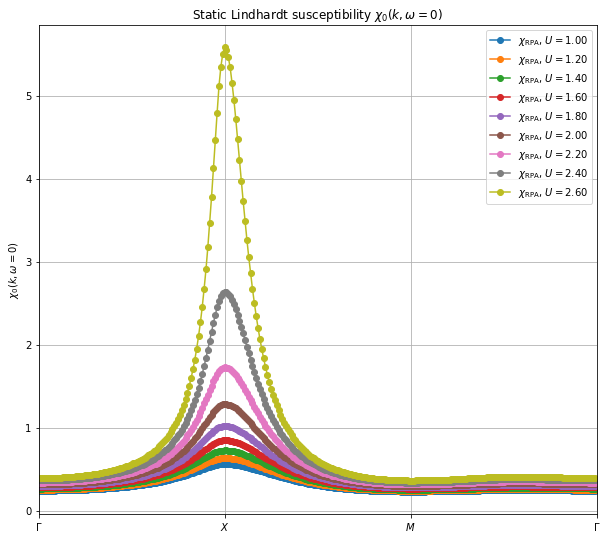

In [26]:
import itertools
n_step = 100
def path(ki, kf):   # generates a linear set of points between ki and kf
    for x in np.arange(0, 1, 1./n_step):
        yield (1-x) * np.array(ki) + x * np.array(kf) 

G = (0,  0 , 0)
X = (pi, pi, 0) 
M = (pi, 0,  0)
    
for U in np.arange(1., 2.8, 0.2):
    chi = lambda k: (chi0_kw(k,0) / (1. - U * chi0_kw(k,0))).real
    plt.plot([chi(k).real for k in itertools.chain(path(G, X), path(X, M), path(M, G) )], '-o', 
             label=r'$\chi_\mathrm{RPA}$, $U=%2.2f$' % U)
    
#decoration
plt.xlim(0, 3*n_step) # window size
plt.grid()
plt.axes().set_xticks([0, n_step, 2*n_step, 3*n_step])
plt.axes().set_xticklabels([r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$']);
plt.title('Static Lindhard susceptibility $\chi_0(k,\omega=0)$')
plt.ylabel(r'$\chi_0(k,\omega=0)$')
plt.legend(loc='best');
#plt.tight_layout()

## Find critical $U$

At some critical $U_c$ the susceptibility diverges $\chi \rightarrow \infty$ within the random phase approximation. To determine $U_c$ we can study the root of the inverse susceptibility $\chi_{RPA}^{-1}$.

For the square lattice it is sufficient to study the response at $\mathbf{Q}_{AF}= (\pi, \pi)$ since it is the point where the response diverges. Analytically this occurs when the denominator is zero $1 - U_c \chi_0(0, k_{AF}) = 0$, i.e.

$$ U_c^{(RPA)} = \frac{2}{\chi_0(0, \mathbf{Q}_{AF})} $$.

Numerically this looks like

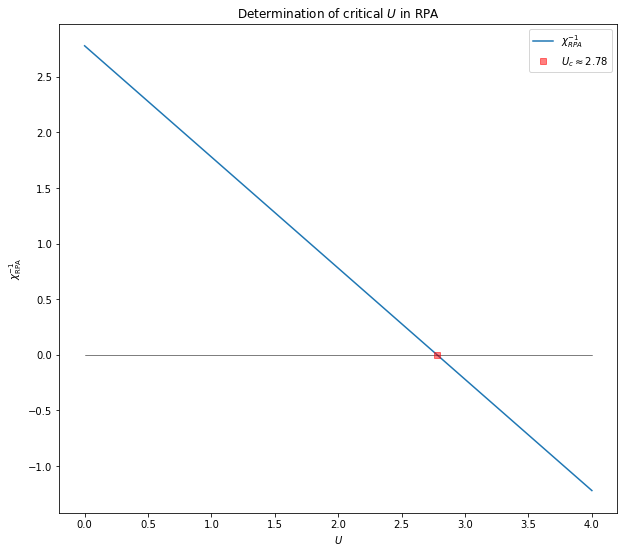

In [27]:
k_AF = (pi, pi, 0)

# Critical U - analytical solution
U_c = 1 / chi0_kw(k_AF, 0).real

Ur = np.linspace(0,4,100)
chi_inv = lambda U: ((1. - U * chi0_kw(k_AF,0)) / chi0_kw(k_AF, 0)).real

plt.plot(Ur, chi_inv(Ur), label=r'$\chi_{RPA}^{-1}$')
plt.plot(Ur, np.zeros_like(Ur), 'k', lw=0.5)
plt.plot(U_c, 0, 'rs', label=r'$U_c \approx %2.2f$'%U_c, alpha=0.5) # a red point at the analytic solution

# decoration
plt.title("Determination of critical $U$ in RPA")
plt.xlabel(r'$U$')
plt.ylabel(r'$\chi_\mathrm{RPA}^{-1}$')
plt.legend(loc='best');